In [38]:
import pandas as pd
tel_data=pd.read_csv("telescope_data.csv")

In [39]:
tel_data.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [40]:
tel_data.columns=[cols.lower() for cols in tel_data.columns]

In [41]:
tel_data.head()

,unnamed: 0,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [42]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed: 0  19020 non-null  int64  
 1   flength     19020 non-null  float64
 2   fwidth      19020 non-null  float64
 3   fsize       19020 non-null  float64
 4   fconc       19020 non-null  float64
 5   fconc1      19020 non-null  float64
 6   fasym       19020 non-null  float64
 7   fm3long     19020 non-null  float64
 8   fm3trans    19020 non-null  float64
 9   falpha      19020 non-null  float64
 10  fdist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


In [43]:
tel_data.describe()

,unnamed: 0,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


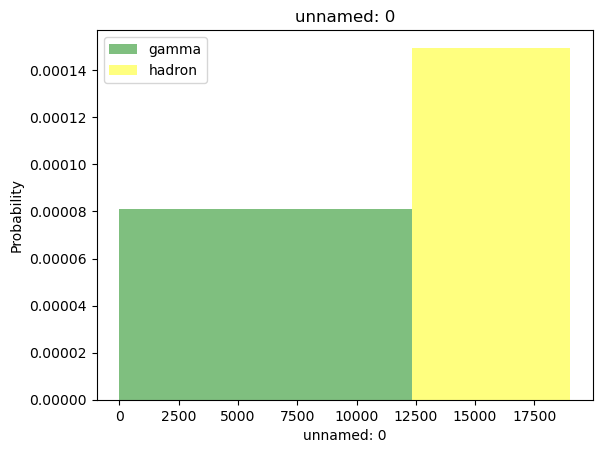

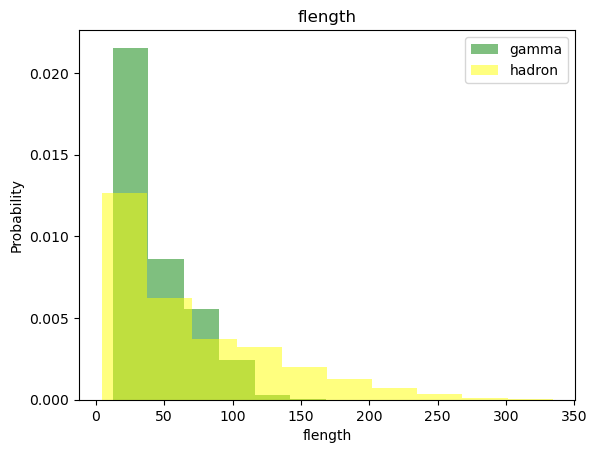

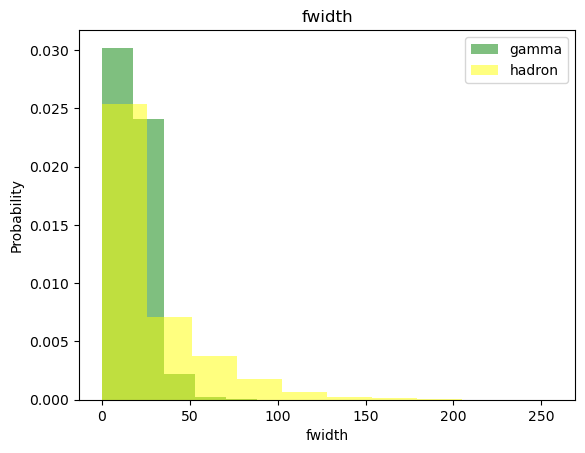

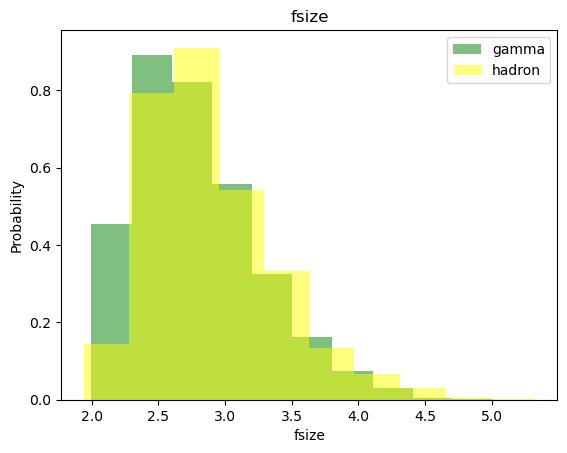

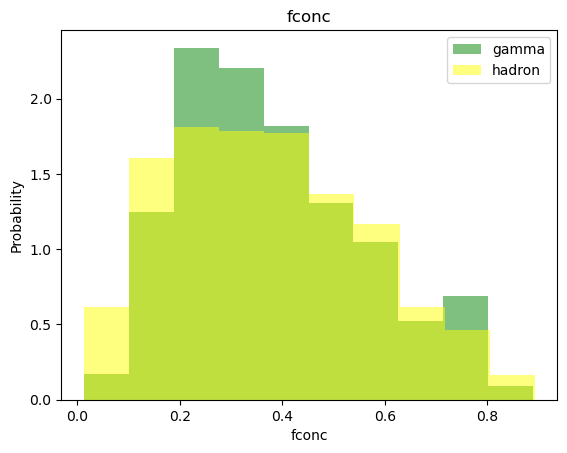

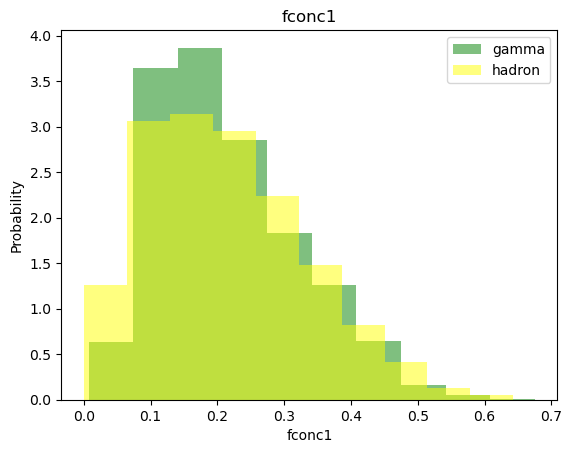

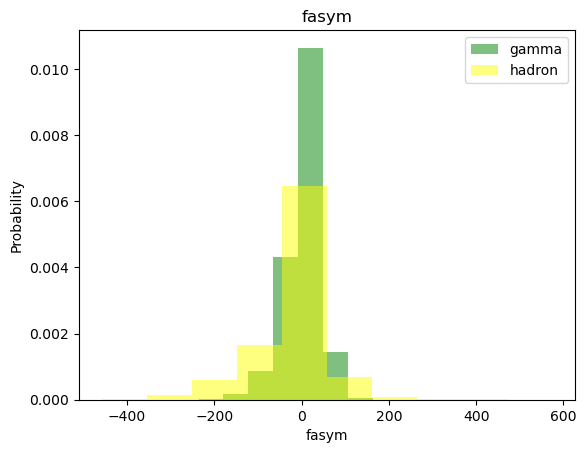

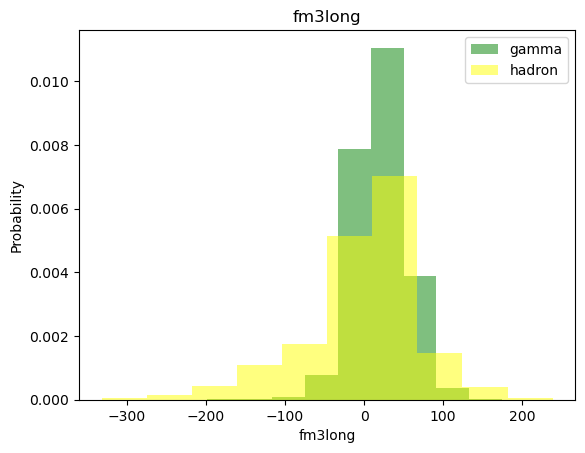

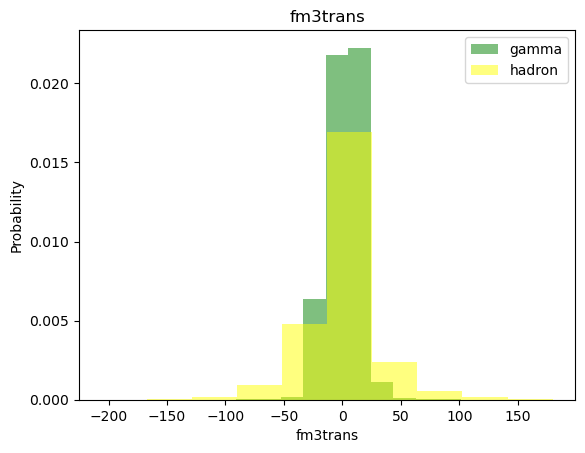

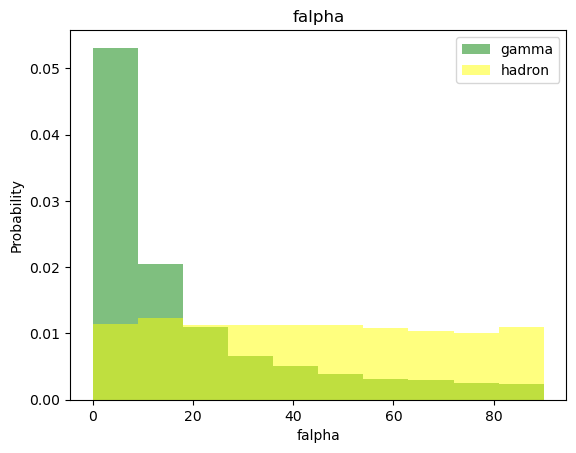

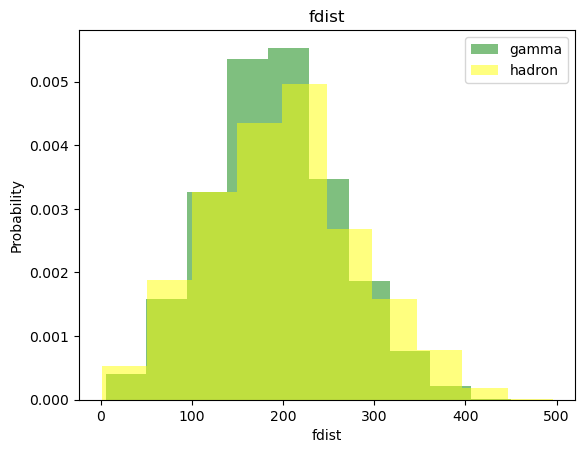

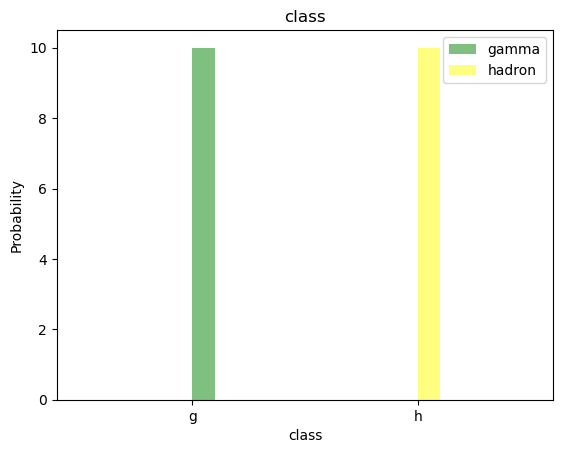

In [44]:
import matplotlib.pyplot as plt
for label in (tel_data.columns):
    plt.hist(tel_data[tel_data['class']=='g'][label],color='green',label='gamma',alpha=0.5,density=True)    
    plt.hist(tel_data[tel_data['class']=='h'][label],color='yellow',label='hadron',alpha=0.5,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

In [45]:
from sklearn.model_selection import train_test_split
ds_train,ds_test=train_test_split(tel_data,test_size=0.2)

In [46]:
print(len(ds_train))
print(len(ds_test))

15216
3804


In [47]:
print(len(ds_train[ds_train['class']=='g']))
print(len(ds_train[ds_train['class']=='h']))

9846
5370


In [48]:
from imblearn.over_sampling import RandomOverSampler
r_sam=RandomOverSampler()
in_ds_train=ds_train.drop(columns=['class'])
out_ds_train=ds_train['class']

In [49]:
print(in_ds_train)

       unnamed: 0   flength   fwidth   fsize   fconc  fconc1     fasym  \
4417         4417   40.7402  14.4881  2.7582  0.3054  0.1667   24.9647   
18946       18946  223.3749  62.8629  3.2057  0.2011  0.1496 -236.0440   
16350       16350  122.1989  32.9978  3.0650  0.3466  0.2145  124.7208   
10686       10686   28.9503  21.2395  2.8663  0.3116  0.1653   24.4079   
2481         2481   28.7776  15.0950  2.4683  0.4116  0.2160    9.8831   
...           ...       ...      ...     ...     ...     ...       ...   
2320         2320   24.7122  16.1387  2.5988  0.5088  0.3287   27.2902   
609           609   56.5206  25.5338  3.3015  0.1728  0.0872   37.5944   
17818       17818  134.9928  88.3470  4.5317  0.0686  0.0412  -72.6007   
9778         9778   28.5000  14.5305  2.7300  0.3706  0.1927   27.8753   
2467         2467   12.4992  11.9681  2.0394  0.6941  0.3516   15.4763   

        fm3long  fm3trans   falpha     fdist  
4417    20.2770    7.8186   2.0630  183.5880  
18946 -161.2892  

In [50]:
print(out_ds_train)

4417     g
18946    h
16350    h
10686    g
2481     g
        ..
2320     g
609      g
17818    h
9778     g
2467     g
Name: class, Length: 15216, dtype: object


In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
in_ds_train=scaler.fit_transform(in_ds_train)
print(in_ds_train)

[[-0.92602657 -0.29272021 -0.42141732 ...  0.36495373 -0.98558117
  -0.13389554]
 [ 1.71488672  4.01762712  2.24021652 ... -2.21259681  1.73082453
   1.16525832]
 [ 1.24301591  1.62978022  0.5970064  ...  0.83927752  0.59372135
  -0.22626308]
 ...
 [ 1.50985194  1.93172806  3.64237928 ... -2.37285468 -0.97038361
   1.00680412]
 [ 0.0484339  -0.58160022 -0.41908443 ...  0.45021265 -0.99940062
  -0.78010526]
 [-1.28047497 -0.95923385 -0.56007045 ...  0.52736474 -0.23883336
  -1.74999651]]


In [52]:
in_ds_train,out_ds_train=r_sam.fit_resample(in_ds_train,out_ds_train)
print(len(out_ds_train))
print(sum(out_ds_train=='g'))
print(sum(out_ds_train=='h'))

19692
9846
9846


In [53]:
in_ds_test=ds_test.drop(columns=['class'])
out_ds_test=ds_test['class']
in_ds_test=scaler.fit_transform(in_ds_test)

In [54]:
print(len(in_ds_test))

3804


In [62]:
from sklearn.neighbors import KNeighborsClassifier
#knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(in_ds_train,out_ds_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
out_pred=knn_model.predict(in_ds_test)

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.metrics import accuracy_score
accuracy_info=accuracy_score(out_ds_test,out_pred)
accuracy_info

0.9729232386961093

In [66]:
from sklearn.metrics import classification_report
print(classification_report(out_ds_test,out_pred))

              precision    recall  f1-score   support

           g       0.98      0.97      0.98      2486
           h       0.95      0.97      0.96      1318

    accuracy                           0.97      3804
   macro avg       0.97      0.97      0.97      3804
weighted avg       0.97      0.97      0.97      3804

